In [2]:
import pandas as pd
import numpy as np

from pydataset import data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# ignore warnings
import warnings
warnings.filterwarnings("ignore")



import env
import acquire

### Imports for Data Prep

In [3]:
# not imported from beginning of notebook
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# random_state = 123

Imports for Exploration Analysys

In [4]:
import sklearn.model_selection
import scipy.stats as stats

df = acquire.get_titanic_data()
# use the same random seed and train size as we did earlier to get the same train split
train, test = sklearn.model_selection.train_test_split(df, random_state=123, train_size=.8)
train.head()

train = train.drop(columns=['passenger_id', 'embarked', 'class', 'deck'])

# Classification: Data Aquisition

In [89]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [2]:
df_iris = data('iris')

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### Print number of rows and columns

In [4]:
print(f'This data has {df_iris.shape[0]} rows and {df_iris.shape[1]} columns.')

This data has 150 rows and 5 columns.


### Print column names

In [5]:
print(df_iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [6]:
# cleaning up the columns might be a good choise here
df_iris.columns = df_iris.columns.str.replace('.', '_').str.lower()
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [7]:
# another way to print the column names to a list
df_iris.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

recommend resclaing the data bases on output???

In [10]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Loading the iris data from `seaborn`

In [11]:
# using seaborn datasets
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### you can also get the data that is already to use in a DataFrame

In [12]:
# using sklearn datasets

from sklearn import datasets

sk_iris = datasets.load_iris()
type(sk_iris)

sklearn.utils.Bunch

In [13]:
sk_iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
# Create the DataFrame using 'data' and name the columns using 'feature_names'

sk_iris_df = pd.DataFrame(sk_iris.data, columns=sk_iris.feature_names)
sk_iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [15]:
# Add the target variable, species, using 'target'. Here we get our target as a numeric value already!

sk_iris_df['species'] = sk_iris.target
sk_iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [16]:
# You may want to clean up the column names, but you may want to leave them intact for use in viz, too.

sk_iris_df.columns = sk_iris_df.columns.str.replace(' \(cm\)', '').str.replace(' ', '_')
sk_iris_df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

### Load `Table1_CustDetails` from excel spreadsheet `Spreadsheets_Exercises.xlsx` into dataframe `df_excel`

In [17]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No


### Assign the first 100 rows to a new dataframe `df_example`

In [18]:
# df_example_sample = df_excel[0:101]
df_example_sample = df_excel.head(100)
df_example_sample.head(10)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


In [19]:
df_example_sample.shape

(100, 12)

In [20]:
print(df_example_sample.iloc[0,:5])

customer_id          0002-ORFBO
gender                   Female
is_senior_citizen             0
partner                     Yes
dependents                  Yes
Name: 0, dtype: object


###  Print the column names that have a data type of object


In [21]:
df_example_sample.select_dtypes('object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [22]:
# can also do this to get the column names that only have a object data type
pd.Series(df_example_sample.select_dtypes(object).columns)

0     customer_id
1          gender
2         partner
3      dependents
4    payment_type
5           churn
dtype: object

In [23]:
# Feeling loopy?

for col in df_example_sample:
    if df_example_sample[col].dtype == 'O':
        print(col)

customer_id
gender
partner
dependents
payment_type
churn


In [24]:
# anther way to loop is with list comprehension

[col for col in df_example_sample if df_example_sample[col].dtype == 'O'] # the letter o must be Capitalized

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

### Compute the range for each of the numeric variables.


In [91]:
df_example_sample.head(1)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.3,No


In [28]:
numeric_df = df_example_sample.select_dtypes(['int64', 'float64'])
print(f'The range of each numeric columns is:')
print('-------------------------------------')
print(round(numeric_df.max() - numeric_df.min(),2))

The range of each numeric columns is:
-------------------------------------
is_senior_citizen       1.00
phone_service           2.00
internet_service        2.00
contract_type           2.00
monthly_charges        97.40
total_charges        8476.85
dtype: float64


In [29]:
# lets convert some of these columns into objects

df_example_sample = df_example_sample.astype({"is_senior_citizen": "object", "phone_service": "object", "internet_service": "object", "contract_type": "object"})

df_example_sample.dtypes

customer_id           object
gender                object
is_senior_citizen     object
partner               object
dependents            object
phone_service         object
internet_service      object
contract_type         object
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [92]:
numeric_df = df_example_sample.select_dtypes(['float64'])
print(f'The range of each numeric columns is:')
print('-------------------------------------')
print(round(numeric_df.max() - numeric_df.min(),2))

The range of each numeric columns is:
-------------------------------------
monthly_charges      97.40
total_charges      8476.85
dtype: float64


#### Reading data into pandas from a google sheet

- https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing

In [93]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Print first 3 rows

In [32]:
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Print column names

In [94]:
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [95]:
df_googlesheet.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### print data type of each column

In [96]:
df_googlesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Print the summary statistics for each of the numeric variables

In [98]:
df_googlesheet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Print the unique values for each of your categorical variables

In [36]:
df_googlesheet.select_dtypes(object).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [37]:
pd.Series(df_googlesheet.Name.unique())

0                                  Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                   Heikkinen, Miss. Laina
3             Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                 Allen, Mr. William Henry
                              ...                         
886                                  Montvila, Rev. Juozas
887                           Graham, Miss. Margaret Edith
888               Johnston, Miss. Catherine Helen "Carrie"
889                                  Behr, Mr. Karl Howell
890                                    Dooley, Mr. Patrick
Length: 891, dtype: object

In [38]:
df_googlesheet.Name.value_counts(dropna=False)

Crosby, Miss. Harriet R                           1
Andersson, Miss. Ingeborg Constanzia              1
Keefe, Mr. Arthur                                 1
Attalah, Miss. Malake                             1
Sjostedt, Mr. Ernst Adolf                         1
                                                 ..
Artagaveytia, Mr. Ramon                           1
Elsbury, Mr. William James                        1
Farrell, Mr. James                                1
Bradley, Mr. George ("George Arthur Brayton")     1
Morley, Mr. Henry Samuel ("Mr Henry Marshall")    1
Name: Name, Length: 891, dtype: int64

In [39]:
pd.Series(df_googlesheet.Sex.unique())

0      male
1    female
dtype: object

In [40]:
pd.Series(df_googlesheet.Ticket.unique())

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
676     SOTON/OQ 392076
677              211536
678              112053
679              111369
680              370376
Length: 681, dtype: object

In [41]:
# another way 
df_googlesheet.Ticket.value_counts(dropna=False)

CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
65303       1
349208      1
28665       1
239856      1
PC 17605    1
Name: Ticket, Length: 681, dtype: int64

In [42]:
df_googlesheet.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [43]:
df_googlesheet.Cabin.value_counts(dropna=False)

NaN                687
G6                   4
B96 B98              4
C23 C25 C27          4
F2                   3
C22 C26              3
E101                 3
D                    3
F33                  3
E33                  2
C93                  2
B22                  2
B58 B60              2
C126                 2
C83                  2
B51 B53 B55          2
C92                  2
E25                  2
D26                  2
C68                  2
C78                  2
D33                  2
B28                  2
C125                 2
E44                  2
D20                  2
B20                  2
D35                  2
E8                   2
C123                 2
D17                  2
C52                  2
F4                   2
B57 B59 B63 B66      2
E121                 2
E24                  2
C2                   2
B35                  2
B49                  2
B77                  2
E67                  2
B5                   2
C65                  2
B18        

In [44]:
df_googlesheet.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
df_googlesheet.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [46]:
def cat_uniques(df):
    for col in df:
        if df[col].dtype == 'O':
            print(col)
            print('-------------')
            print(df[col].value_counts(dropna=False))
            print('-------------')

In [47]:
cat_uniques(df_googlesheet)

Name
-------------
Crosby, Miss. Harriet R                           1
Andersson, Miss. Ingeborg Constanzia              1
Keefe, Mr. Arthur                                 1
Attalah, Miss. Malake                             1
Sjostedt, Mr. Ernst Adolf                         1
                                                 ..
Artagaveytia, Mr. Ramon                           1
Elsbury, Mr. William James                        1
Farrell, Mr. James                                1
Bradley, Mr. George ("George Arthur Brayton")     1
Morley, Mr. Henry Samuel ("Mr Henry Marshall")    1
Name: Name, Length: 891, dtype: int64
-------------
Sex
-------------
male      577
female    314
Name: Sex, dtype: int64
-------------
Ticket
-------------
CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
65303       1
349208      1
28665       1
239856      1
PC 17605    1
Name: Ticket, Length: 681, dtype: int64
-------------
Cabin
-------------
NaN                687
G

### Functions to get the iris data

In [208]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host, dbname)

In [209]:
def get_titanic_data():
    sql_query = 'SELECT * FROM passengers'
    return pd.read_sql(sql_query, get_db_url('titanic_db'))

In [210]:
titanic_df = get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


### get_titanic_data

In [99]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host, dbname)

In [102]:
def get_titanic_data():
    sql_query = 'SELECT * FROM passengers'
    return pd.read_sql(sql_query, get_db_url('titanic_db'))

In [103]:
titanic_df = get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


# Classification: Data Prep

## Get Iris Data

In [107]:
iris_df = acquire.get_iris_data()
iris_df.head(3)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2


### Drop the `species_id` and `measurement_id` column

My SQL query did not contain the column `measurement_id` 

In [108]:
iris_df = iris_df.drop(columns='species_id')

In [109]:
iris_df.head(3)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2


### Renaming the `species_name` column to `species`

In [112]:
iris_df = iris_df.rename(columns={"species_name": "species"})
iris_df.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2


### Now is the time we should split the dataframe into train and test. This helps avoid leakage

In [116]:
train, test = train_test_split(iris_df, train_size=.75, stratify=iris_df.species, random_state=123)

In [117]:
train.shape

(112, 5)

In [118]:
test.shape

(38, 5)

### Encode the species name using sklearn label encoder

Research the `inverse_transform` method of the label encoder. How might this be useful?

In [119]:
le = LabelEncoder()

In [120]:
train['species'] = le.fit_transform(train.species)

In [121]:
test['species'] = le.transform(test.species)

In [122]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
30,0,4.8,3.1,1.6,0.2
36,0,5.5,3.5,1.3,0.2
29,0,4.7,3.2,1.6,0.2
55,1,5.7,2.8,4.5,1.3
118,2,7.7,2.6,6.9,2.3


In [123]:
test.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width
135,2,7.7,3.0,6.1,2.3


### create function named `prep_iris` that accepts the untransformed `iris_data` and returns the data with the transformations above applied

In [124]:
def label_encode(train, test):
    le = LabelEncoder()
    train['species'] = le.fit_transform(train.species)
    test['species'] = le.transform(test.species)
    return le, train, test

In [125]:
def prep_iris(df):
    df = df.drop(columns='species_id')
    df = df.rename(columns={'species_name': 'species'})
    train, test = train_test_split(df, train_size=.75, stratify=df.species, random_state=123)
    train, test, le = label_encode(train, test)
    return train, test, le

In [126]:
# Check our stratify on our target variable

train.species.value_counts(normalize=True)

0    0.339286
2    0.330357
1    0.330357
Name: species, dtype: float64

In [127]:
test.species.value_counts(normalize=True)

2    0.342105
1    0.342105
0    0.315789
Name: species, dtype: float64

### how can we get our species name back? 

In [128]:
def inverse_encode(train, test, le):
    train['species'] = le.inverse_transform(train.species)
    test['species'] = le.inverse_transform(test.species)
    return train, test

In [129]:
train, test = inverse_encode(train, test, le)

In [130]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
30,setosa,4.8,3.1,1.6,0.2
36,setosa,5.5,3.5,1.3,0.2
29,setosa,4.7,3.2,1.6,0.2
55,versicolor,5.7,2.8,4.5,1.3
118,virginica,7.7,2.6,6.9,2.3


## Titanic Data

In [131]:
titanic_df = acquire.get_titanic_data()

In [132]:
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


### Remove `deck` column

In [133]:
titanic_df.drop(columns=['deck'], inplace=True)

In [134]:
titanic_df.columns.tolist()

['passenger_id',
 'survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'embark_town',
 'alone']

## Split data into train and test

In [135]:
t_train, t_test = train_test_split(titanic_df, train_size=.75, stratify=titanic_df.survived, random_state=123)

In [136]:
t_train.shape

(668, 12)

In [137]:
t_test.shape

(223, 12)

### missing values in `embark_town` and `embarked` columns

In [138]:
t_train.embark_town.value_counts(dropna=False)

Southampton    481
Cherbourg      133
Queenstown      53
NaN              1
Name: embark_town, dtype: int64

In [139]:
# fill nan values with the mode

t_train['embark_town'] = t_train['embark_town'].fillna('Southampton')

In [140]:
t_train.embark_town.value_counts(dropna=False)

Southampton    482
Cherbourg      133
Queenstown      53
Name: embark_town, dtype: int64

In [141]:
t_train.embarked.value_counts(dropna=False)

S      481
C      133
Q       53
NaN      1
Name: embarked, dtype: int64

In [142]:
t_train['embarked'] = t_train['embarked'].fillna('S')

In [143]:
t_train.embarked.value_counts(dropna=False)

S    482
C    133
Q     53
Name: embarked, dtype: int64

### Use a label encoder to transform the embarked column.

One-Hot Encoding takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

In [144]:
ohe = OneHotEncoder(sparse=False, categories='auto')
t_train_matrix = ohe.fit_transform(t_train[['embarked']])

In [145]:
# Create the array of values

t_train_matrix

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [146]:
# Create the DataFrame of encoded values

t_train_ohe = pd.DataFrame(t_train_matrix, columns=ohe.categories_[0], index=t_train.index)
t_train_ohe.head(3)

,C,Q,S
683,0.0,0.0,1.0
421,0.0,1.0,0.0
336,0.0,0.0,1.0


In [147]:
# Join the encoded train DataFrame with our train DataFrame

t_train = t_train.join(t_train_ohe)
t_train.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S
683,683,0,3,male,14.0,5,2,46.9000,S,Third,Southampton,0,0.0,0.0,1.0
421,421,0,3,male,21.0,0,0,7.7333,Q,Third,Queenstown,1,0.0,1.0,0.0
336,336,0,1,male,29.0,1,0,66.6000,S,First,Southampton,0,0.0,0.0,1.0


In [148]:
def ohe_columns(train, test):
    ohe = OneHotEncoder(sparse=False, categories='auto')
    train_matrix = ohe.fit_transform(train[['embarked']])
    test_matrix = ohe.transform(test[['embarked']])
    train = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)
    test = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)
    return ohe, train, test

### Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

- You wouldn't want to scale these columns when you're exploring the data or trying to explain the data to others. The Scaled data can be very confusing in explanatory charts

In [149]:
scaler = MinMaxScaler()

In [150]:
t_train[['age','fare']] = scaler.fit_transform(t_train[['age','fare']])

In [151]:
t_train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S
683,683,0,3,male,0.184561,5,2,0.091543,S,Third,Southampton,0,0.0,0.0,1.0
421,421,0,3,male,0.279696,0,0,0.015094,Q,Third,Queenstown,1,0.0,1.0,0.0
336,336,0,1,male,0.388421,1,0,0.129995,S,First,Southampton,0,0.0,0.0,1.0
681,681,1,1,male,0.361239,0,0,0.149765,C,First,Cherbourg,1,1.0,0.0,0.0
610,610,0,3,female,0.524327,1,5,0.061045,S,Third,Southampton,0,0.0,0.0,1.0


### Creating functions that will make a larger function named `prep_titanic` that will accept untransformed titanic data, and returns the data with the transformations above applied

In [ ]:
#titanic_df = acquire_walkthrough.get_titanic_data()

In [152]:
#titanic_df.head()

In [153]:
def drop_columns(df):
    df.drop(columns=['deck'], inplace=True)
    return df

In [154]:
#df = drop_columns(titanic_df)
#df.head()

In [155]:
train, test = train_test_split(titanic_df, train_size=.75, stratify=titanic_df.survived, random_state=123)

In [156]:
def impute_embark_town(train, test):
    train['embark_town'] = train['embark_town'].fillna('Southampton')
    test['embark_town'] = test['embark_town'].fillna('Southampton')
    return train, test

In [157]:
def impute_embarked(train, test):
    train['embarked'] = train['embarked'].fillna('S')
    test['embarked'] = test['embarked'].fillna('S')
    return train, test

In [158]:
def impute_age(train, test):
    avg_age = train.age.mean()
    train.age = train.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    return train, test

In [159]:
def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
    test[['age','fare']] = scaler.transform(test[['age','fare']])
    return scaler, train, test

In [160]:
def ohe_columns(train, test):
    # create encoder
    ohe = OneHotEncoder(sparse=False, categories='auto')
    
    # fit scaler on train and transform train and test to dense matrices
    train_matrix = ohe.fit_transform(train[['embarked']])
    test_matrix = ohe.transform(test[['embarked']])
    
    # transform matrices to DataFrames
    train_ohe = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)
    test_ohe = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)
    
    # join encoded matrix with original train or test matrices
    train = train.join(train_ohe)
    test = test.join(test_ohe)
    
    return ohe, train, test

### Mother Function from Our Helpers

In [161]:
def prep_titanic(df):
    # drop the deck column bc most values Null
    drop_columns(df)
    
    train, test = train_test_split(df, train_size=.75, stratify=titanic_df.survived, random_state=123)
    
    # impute 2 NaNs in embark_town with most frequent value
    train, test = impute_embark_town(train, test)
    
    # impute 2 NaNs in embarked with most frequent value
    train, test = impute_embarked(train, test)
    
    # impute NaNs in age in train and test with the mean age in train
    train, test = impute_age(train, test)
    
    # use a minmax scaler on age and fare bc of differing measurement units
    scaler, train, test = scale_columns(train, test)
    
    # ohe embarked creating three new columns for C, Q, S representing embark towns
    ohe, train, test = ohe_columns(train, test)
    
    return scaler, ohe, train, test

In [162]:
t_train.survived.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: survived, dtype: float64

In [163]:
t_test.survived.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: survived, dtype: float64

In [164]:
t_train.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             131
sibsp             0
parch             0
fare              0
embarked          0
class             0
embark_town       0
alone             0
C                 0
Q                 0
S                 0
dtype: int64

In [165]:
t_test.isna().sum()

passenger_id     0
survived         0
pclass           0
sex              0
age             46
sibsp            0
parch            0
fare             0
embarked         1
class            0
embark_town      1
alone            0
dtype: int64

# Classification Exploration Analysis

- Explore the target against the independent variables.
- Data needs are slightly different than for modeling.

In [168]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
329,1,1,female,16.0,0,1,57.9792,Cherbourg,0
749,0,3,male,31.0,0,0,7.7500,Queenstown,1
203,0,3,male,45.5,0,0,7.2250,Cherbourg,1
421,0,3,male,21.0,0,0,7.7333,Queenstown,1
97,1,1,male,23.0,0,1,63.3583,Cherbourg,0
...,...,...,...,...,...,...,...,...,...
98,1,2,female,34.0,0,1,23.0000,Southampton,0
322,1,2,female,30.0,0,0,12.3500,Queenstown,1
382,0,3,male,32.0,0,0,7.9250,Southampton,1
365,0,3,male,30.0,0,0,7.2500,Southampton,1


### Categorical vs Continuous

- boxplot + swarmplot, violinplot -- for these functions, y should be continuous, x should be categorical
- age
- fare

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)

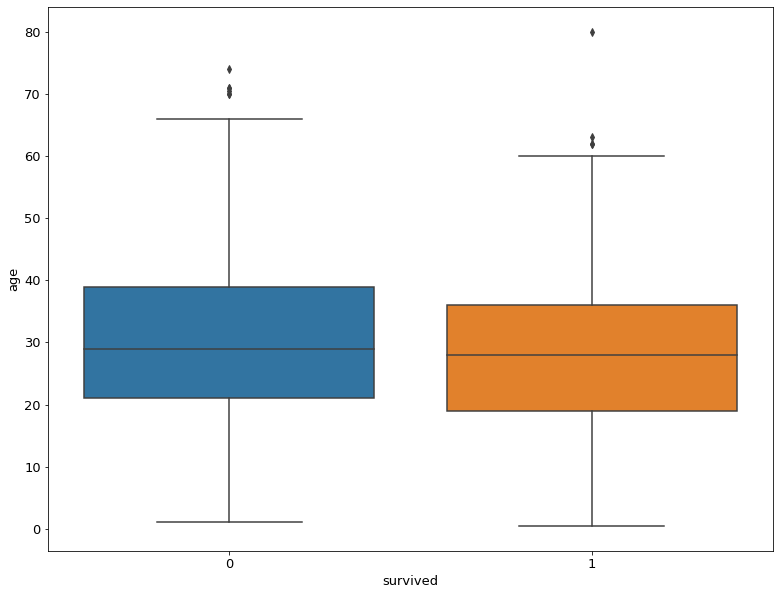

In [171]:
sns.boxplot(y='age', x='survived', data=train)

> Takeaway: no big difference in age

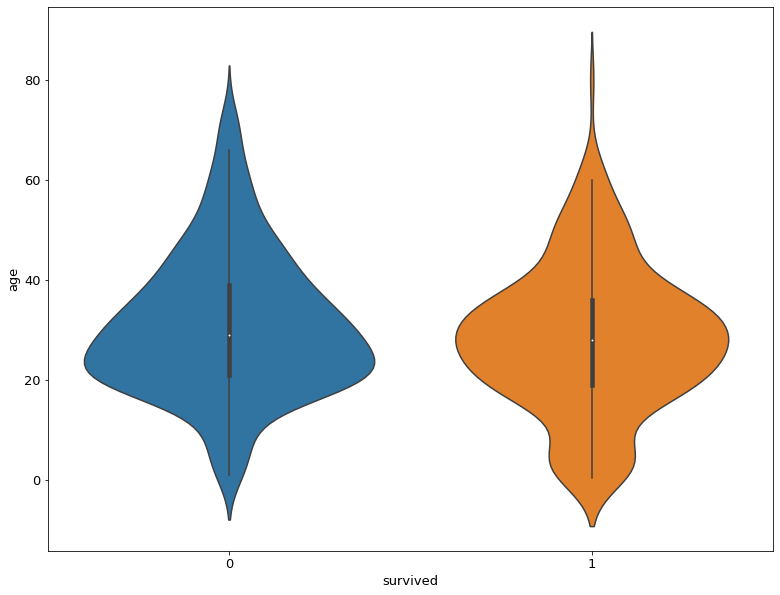

In [172]:
sns.violinplot(y='age', x='survived', data=train)

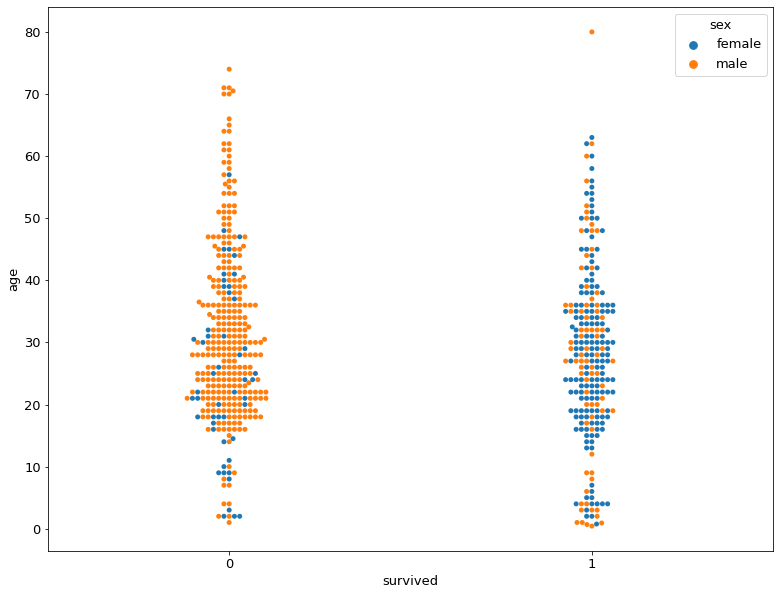

In [173]:
sns.swarmplot(y='age', x='survived', data=train, hue='sex')

Takeaways:

- it wasn't quite captured in the boxplot, but it looks like there is more clustering on the lower end of the `age` variable among those that survived
- It looks like more women survived than men

survived
0    22.501635
1    47.914547
Name: fare, dtype: float64


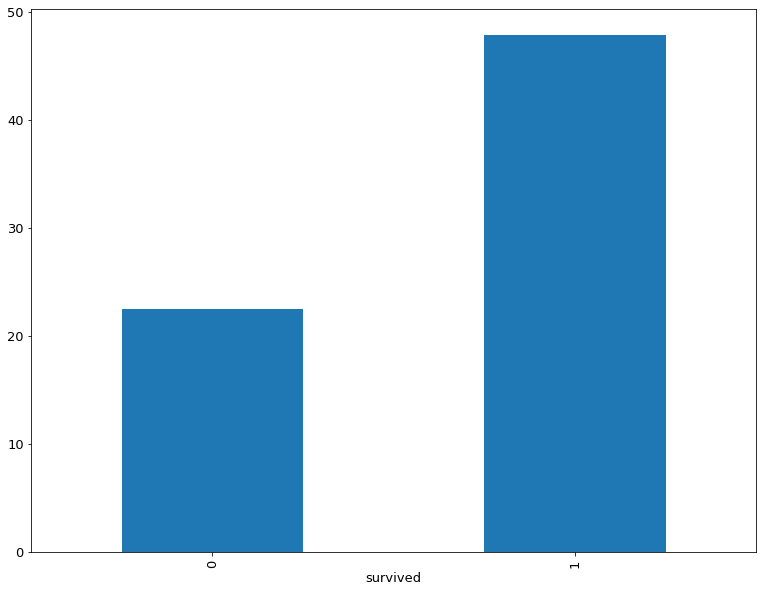

In [174]:
# with a pandas series, .plot.bar will turn the index into xlabels, and the values into bar heights
s = train.groupby('survived').fare.mean()
print(s)
s.plot.bar()

In [175]:
stats.ttest_ind(
    train[train.survived == 1].fare,
    train[train.survived == 0].fare,
)

Ttest_indResult(statistic=6.512874301818937, pvalue=1.3955507135677185e-10)

Takeaway: people that survived paid much more for their tickets.

Question: how does class play into survival rate?

Question: how does sex interact with fare?

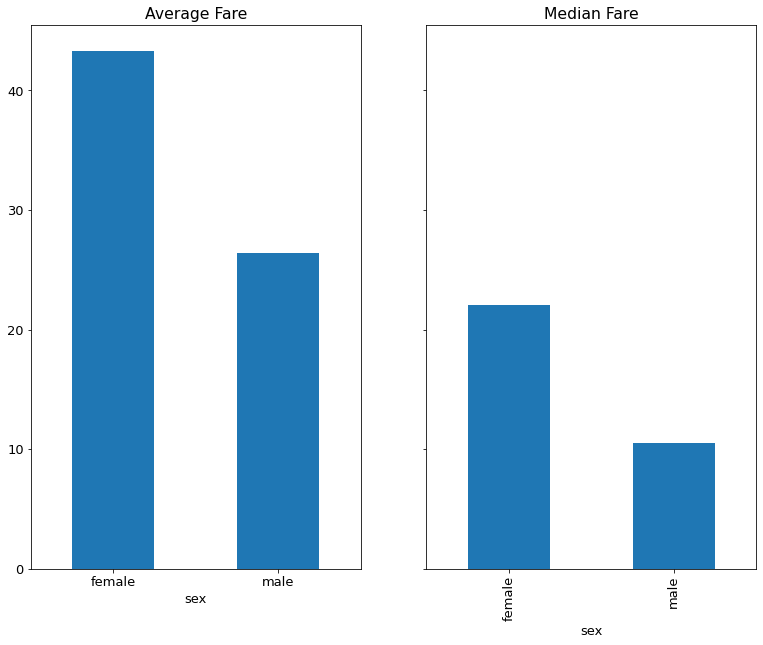

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

train.groupby('sex').fare.mean().plot.bar(ax=ax1, title='Average Fare')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
train.groupby('sex').fare.median().plot.bar(ax=ax2, title='Median Fare')

Question: what is the distribution of sex and class?

One more viz for categorical vs continuous: distribution of fare vs survived

[Text(0.5, 0, 'Fare'), Text(0.5, 1.0, 'Died')]

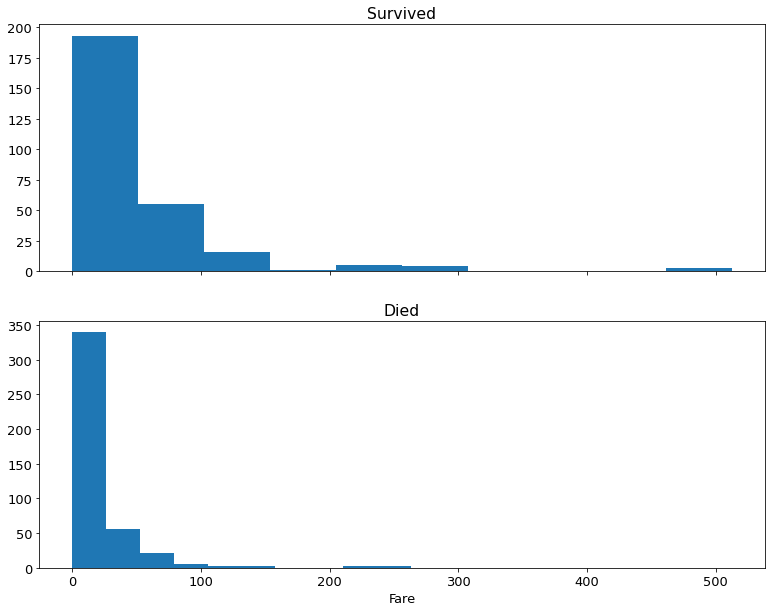

In [177]:
# .subplots(nrows, ncols)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(train[train.survived == 1].fare)
ax1.set(title='Survived')
ax2.hist(train[train.survived == 0].fare)
ax2.set(title='Died', xlabel='Fare')

(<Figure size 936x720 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b1ab7d0>,
       dtype=object))

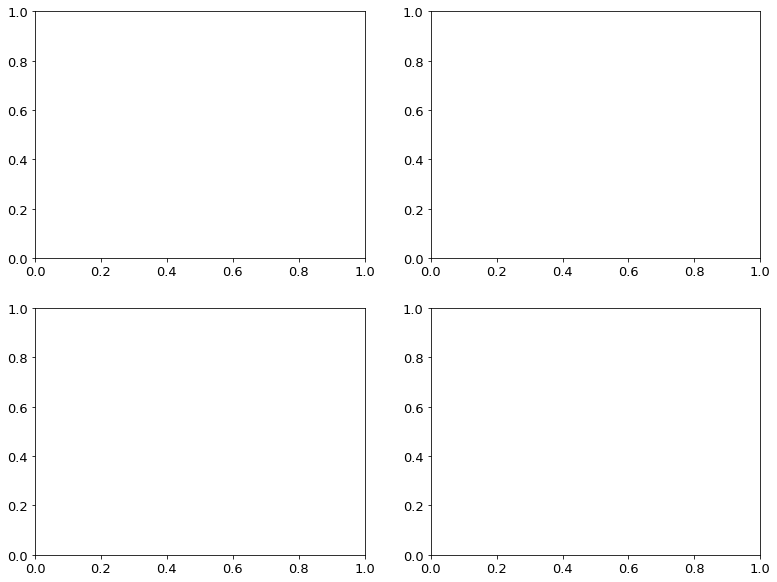

In [178]:
plt.subplots(2, 2)

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, '!Survived')]

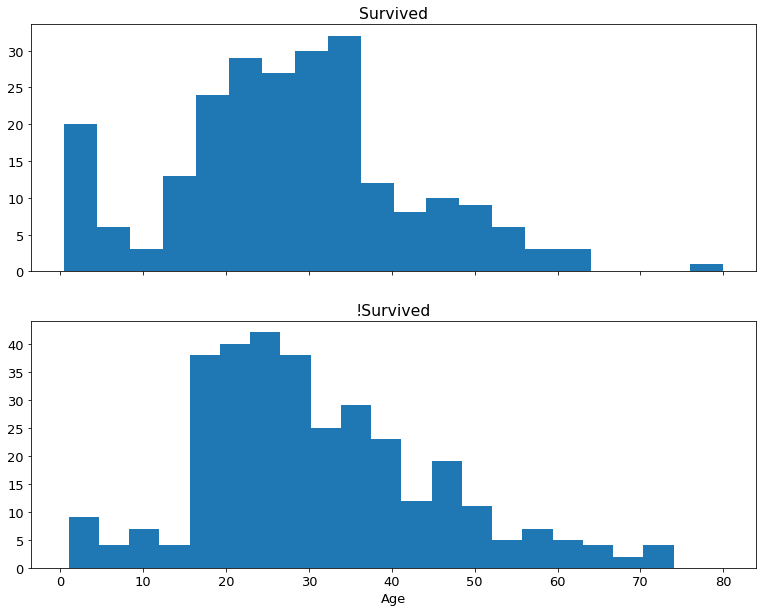

In [179]:
# .subplots returns the figure and each individual axis
# .subplots(nrows, ncols)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(train[train.survived == 1].age, bins=20)
ax1.set(title='Survived')
ax2.hist(train[train.survived == 0].age, bins=20)
ax2.set(title='!Survived', xlabel='Age')

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, '!Survived')]

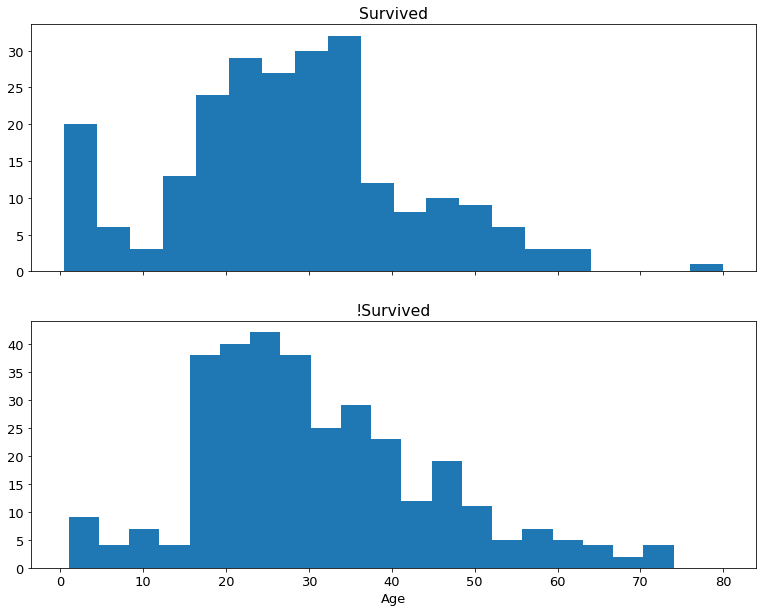

In [180]:
# .subplots returns the figure and each individual axis
# .subplots(nrows, ncols)
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(train[train.survived == 1].age, bins=20)
axs[0].set(title='Survived')
axs[1].hist(train[train.survived == 0].age, bins=20)
axs[1].set(title='!Survived', xlabel='Age')

### Survived against Categorical Features

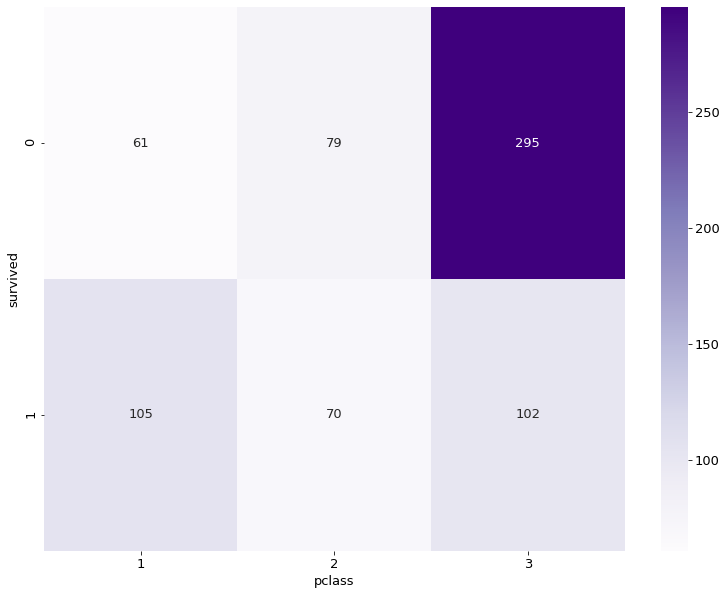

In [181]:
ctab = pd.crosstab(train.survived, train.pclass)
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='d')

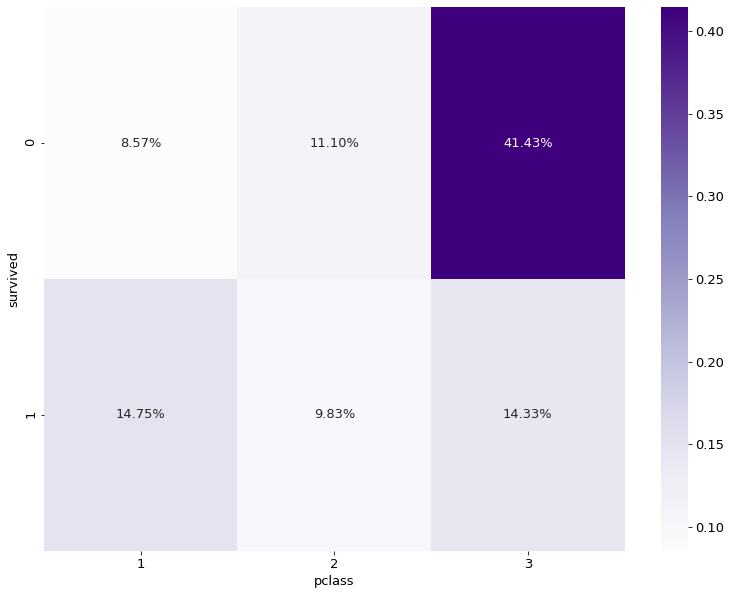

In [182]:
# normalize=True changes from raw counts to proportions
# the sum of all the numbers is 1
ctab = pd.crosstab(train.survived, train.pclass, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.2%')

Takeaways:

- There are many more folks in 3rd class than any other
- The survival rate is higher for first class, lower for 3rd class

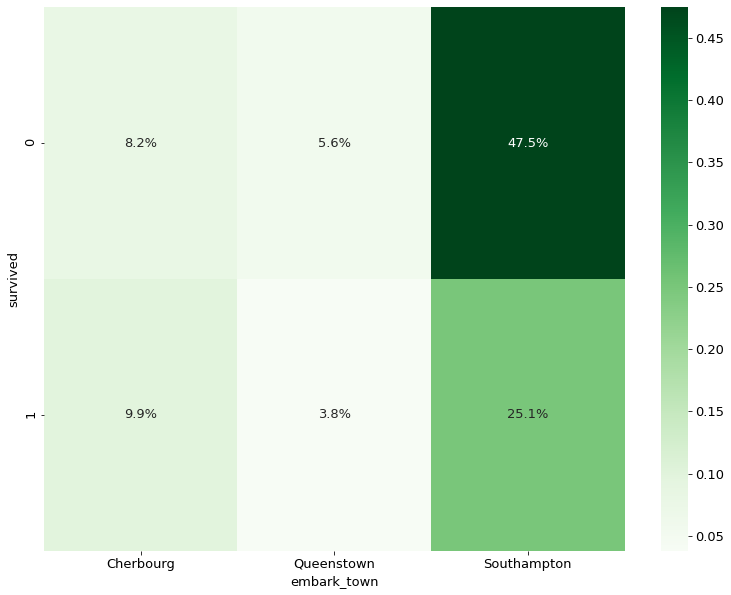

In [184]:
ctab = pd.crosstab(train.survived, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.1%')

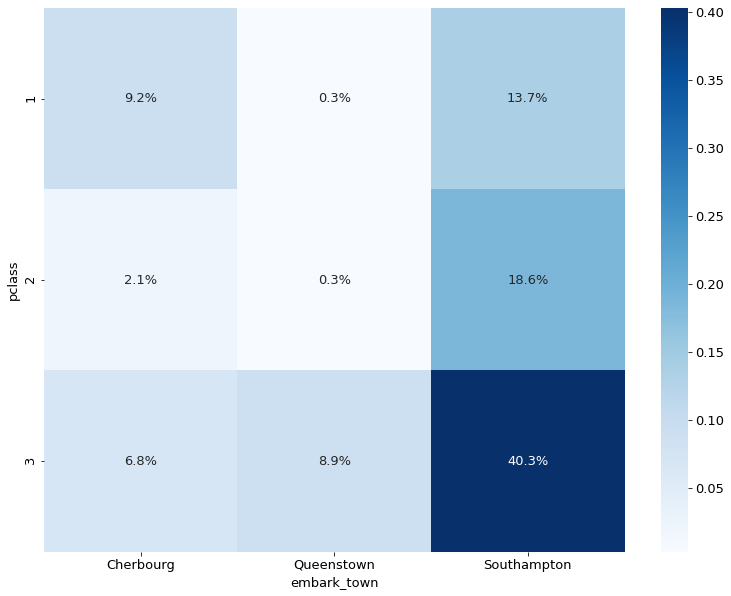

In [185]:
ctab = pd.crosstab(train.pclass, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Blues', fmt='.1%')

### Treat our target as a number

Survived is 1 or 0, this has some nice properties

- the sum of the survived column is the number of people that survived
- the mean is the survival rate
- this applies to subgroups

In [187]:
train.shape[0]

712

In [188]:
train.survived.sum()

277

In [189]:
survived = pd.Series([1, 1, 0])
survived.mean()

0.6666666666666666

In [190]:
train.survived.mean()

0.3890449438202247

In [191]:
train.groupby('sex').survived.mean()

sex
female    0.745020
male      0.195228
Name: survived, dtype: float64

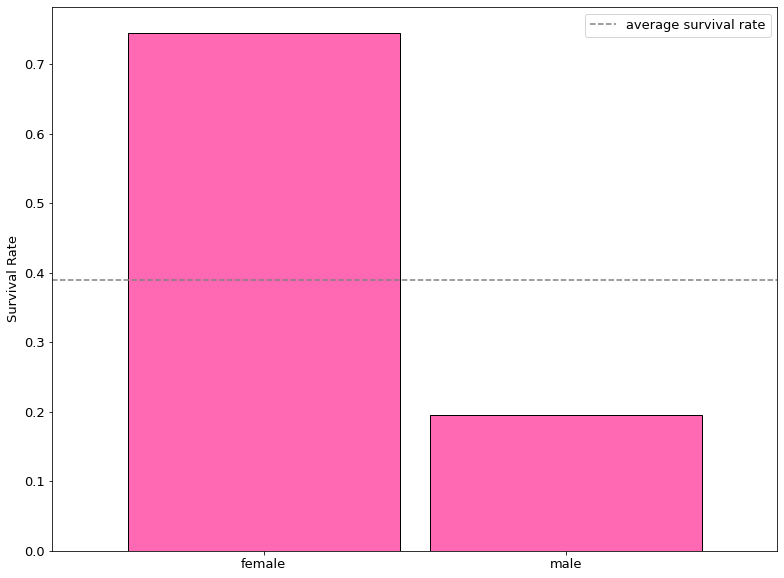

In [192]:
train.groupby('sex').survived.mean().plot.bar(ec='black', fc='hotpink', width=.9, label='')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Survival Rate')
# .hlines draws horizontal lines
# .hlines(height, starts, ends)
# .hlines(y, xmin, xmax)
plt.hlines(train.survived.mean(), *plt.xlim(), ls='--', color='grey', label='average survival rate')
plt.legend()

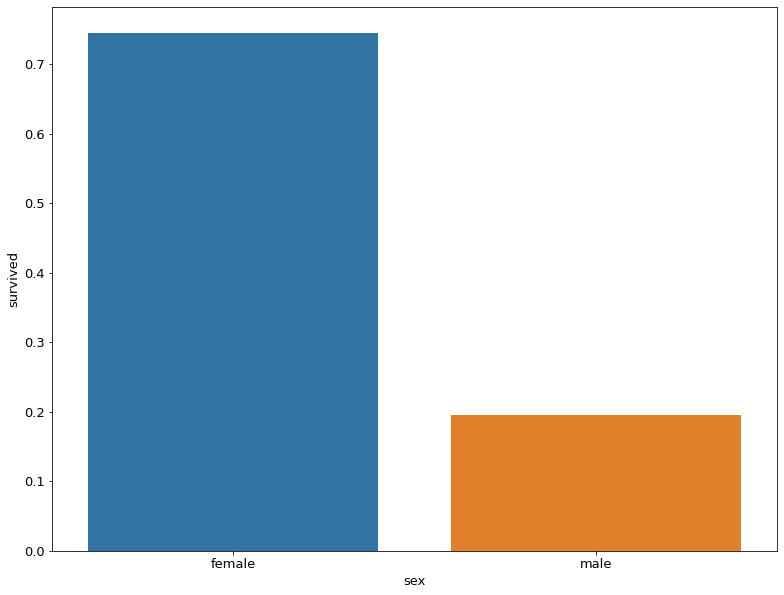

In [193]:
sns.barplot(x='sex', y='survived', data=train, ci=None)

### Exploring our "categorical" target by 2 different categories

In [194]:
train.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.985714
        male      0.375000
2       female    0.919355
        male      0.149425
3       female    0.512605
        male      0.147482
Name: survived, dtype: float64

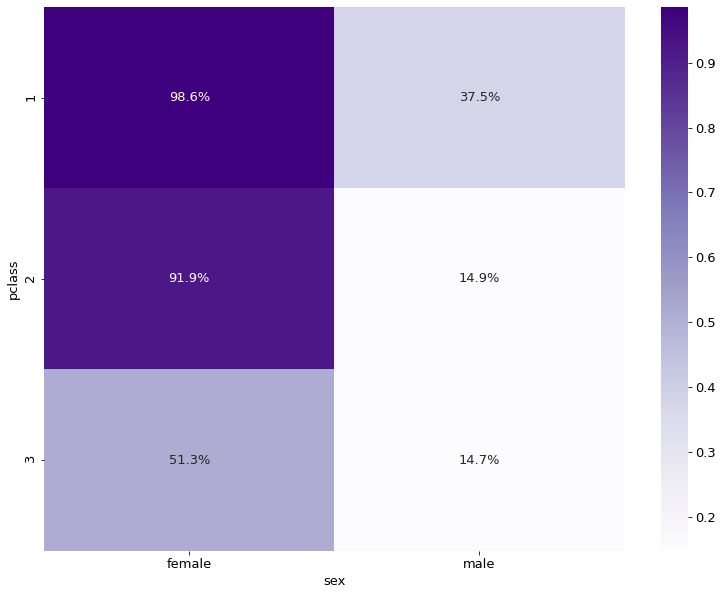

In [195]:
ctab = pd.crosstab(train.pclass, train.sex, values=train.survived, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')

In [196]:
train.pivot_table('survived', 'pclass', 'sex')

sex,female,male
pclass,,
1,0.985714,0.375000
2,0.919355,0.149425
3,0.512605,0.147482


### Proportions within a group

- what percentage of people from each embark town are in each class?
- **not** what percentage of the overall population is each of those combinations of categories

Text(0.5, 0, '')

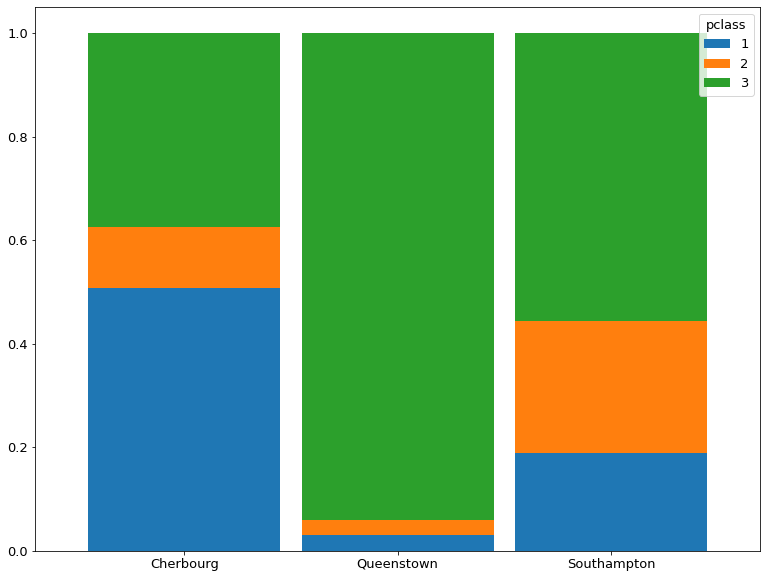

In [197]:
# for every unique embark_town, what is the percentage of values in each class?
x1 = 'embark_town'
x2 = 'pclass'

(train.groupby(x1)[x2]
 .apply(lambda s: s.value_counts(normalize=True)) # custom aggregation to get value counts by group
 .unstack() # turn an index into columns
 .plot.bar(stacked=True, width=.9))
plt.legend(title=x2)
plt.xticks(rotation=0)
plt.xlabel('')

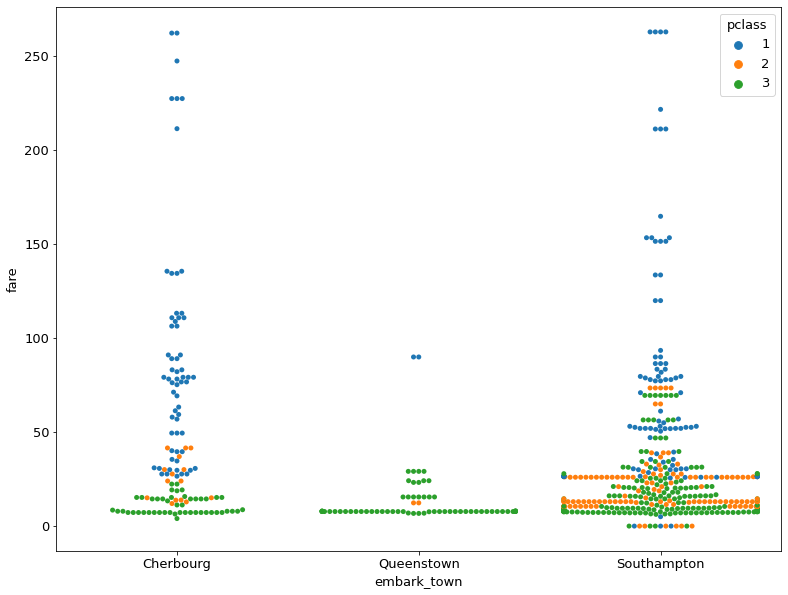

In [198]:
subset = train[train.fare < 300]
sns.swarmplot(y='fare', x='embark_town', data=subset, hue='pclass')

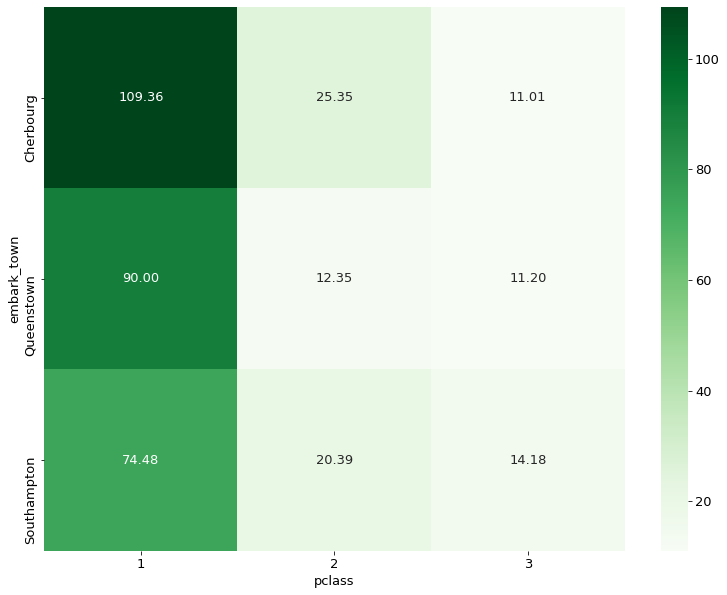

In [199]:
ctab = pd.crosstab(train.embark_town, train.pclass, values=train.fare, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2f')

`pd.melt` -- curriculum code example

- `.melt` lets us combine multiple continuous measures on the same visualization
- We'll talk about it in more detail in a later lesson
- For the exercise, you can use the curriculum example code and change variable names

In [200]:
# "Melt" the dataset to "long-form" representation
subset = train[train.fare < 300][['survived','age','fare']]
subset.head()

,survived,age,fare
329,1,16.0,57.9792
749,0,31.0,7.7500
203,0,45.5,7.2250
421,0,21.0,7.7333
97,1,23.0,63.3583


In [201]:
melt = pd.melt(subset, "survived", var_name="measurement")
melt

,survived,measurement,value
0,1,age,16.000
1,0,age,31.000
2,0,age,45.500
3,0,age,21.000
4,1,age,23.000
...,...,...,...
1413,1,fare,23.000
1414,1,fare,12.350
1415,0,fare,7.925
1416,0,fare,7.250


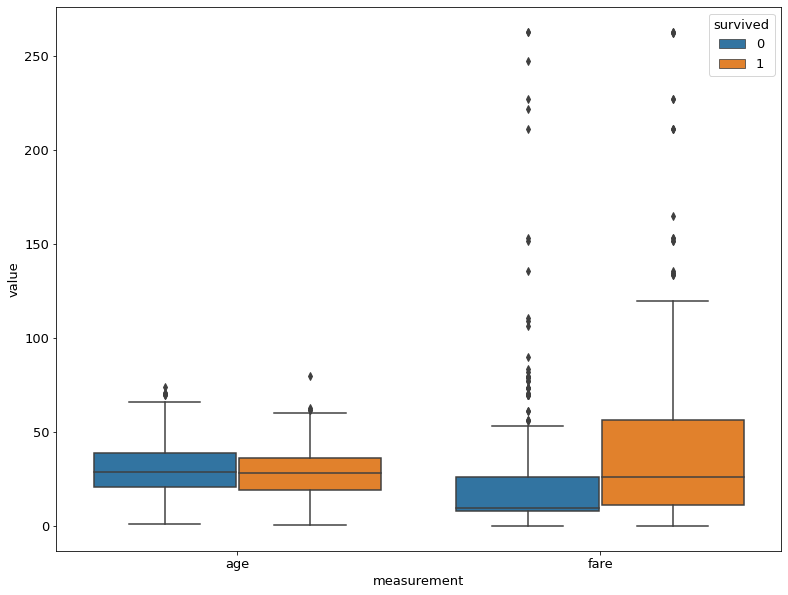

In [202]:
sns.boxplot(data=melt, y='value', x='measurement', hue='survived')

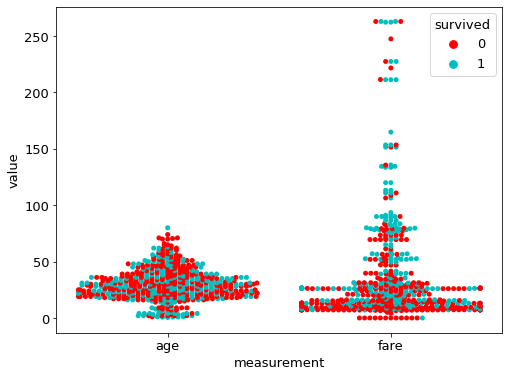

In [203]:
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="survived",
    palette=["r", "c", "y"],
    data=melt
)
# p.set(yscale="log")
plt.show()

### Binning for Exploration

Turning a continuous variable into a categorical one

In [204]:
pd.cut(train.age, 3).value_counts().sort_index()

(0.34, 26.947]      249
(26.947, 53.473]    276
(53.473, 80.0]       39
Name: age, dtype: int64

In [205]:
pd.qcut(train.age, 3).value_counts().sort_index()

(0.419, 23.0]    195
(23.0, 34.0]     183
(34.0, 80.0]     186
Name: age, dtype: int64

In [206]:
train['age_bin'] = pd.cut(train.age, bins=[0, 18, 80], labels=['child', 'adult'])

In [207]:
train.groupby('age_bin').survived.mean()

age_bin
child    0.514286
adult    0.396514
Name: survived, dtype: float64

## Exercises

1. Split data into train (70%) & test (30%) samples.

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8. What are your takeaways?

4. Create a heatmap of each variable layering correlation coefficient on top.

5. Create a scatter matrix visualizing the interaction of each variable

6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

- must include null hypothesis, alternative hypothesis, t-test, results, summary
- $H_o$: the difference in sepal length between virginica and versicolor is insignificant.
- $H_a$: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable `sepal_length` is a good choice to keep as a feature.
- We can use a t-test here, as `sepal_length` is somewhat normally distributed.

# Classification: Evaluation